# Life Expectancy and GDP

### Introduction
- This project analyzes data on GDP and life expectancy from the World Health Organization and the World Bank to identify the relationship between GDP and life expectancy of six countries.

### Scope

#### Goal
- Find the relationship between a country's life expectancy and its total GDP.

#### Actions
- EDA using Python libraries such as Pandas and Numpy
- Use hypothesis tests and data visulization to find association.

**If there is an association between total GDP and life expectancy:**
1. What further analysis can be performed to analyze the relationship.
2. What other possible factors can affect the country's life expectancy.
3. What data can be collected to further support the finding.
4. What other features can be considered in the analysis.
**If there is no association:**
1. What factors can affect on life expectancy.
2. If there is any type I or type II errors during the test.

#### Data
- The data is stored in a csv file and contains four columns: 'Country', 'Year', 'Life expectancy at birth (years)', 'GDP'
- There are six countries: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'
- There is no missing data in the dataset.
- There are 96 entries in total.

#### Analysis Performed:
- Used scatter plots to find any association between total GDP and life expectancy in each country over the 15 years.
- Applied correlation method to prove the finding from the scatter plots.
- Used line plots to find any trend for total GDP and life expectancy in each country during the 15 years.

### Conclusions:
- There is a strong linear association between total GDP and life expectancy for all six countries.
- Both total GDP and life expectancy show positive trend from 2000 to 2015 in all six countries.
- Overall, even though there is a strong relationship between total GDP and life expectancy, total GDP is not the only factor that affects life expectancy.

#### Further Actions for More Accurate Result:
More actions can be done for a more accurate result:
- Data from more countries
- Longer time frame in the data
- Total GDP divided into smaller categories (income, production, expenditure) and see if one category contributes more towards longer life expectancy.
- GDP per capita

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [145]:
#load data and save it as df
df = pd.read_csv('all_data.csv')

#### Inspect Data

In [146]:
# first five rows of df
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [147]:
# last five rows of df
df.tail()

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [149]:
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Mexico,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [150]:
# see if there is any null value
df[df.isna().any(axis=1)]

,Country,Year,Life expectancy at birth (years),GDP


In [151]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [152]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [153]:
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

By inspecting the dataset, we can see that:
- There are four columns ('Country', 'Year', 'Life expectancy at birth (years)', 'GDP'), 96 rows in total. No null values.
- The dataset contains six countries: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'
- In the Year column, there are 16 unique values (2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015). Right now, the Year column's data type is int64; I will convert it into str for easier data visualization.
- In the GDP column, the minimum value is 4.415703e+09 and maximum value is 1.810000e+13. For future calculation and better interpretation, I will divide all values by 1e9.

In [154]:
# change GDP column values
df.GDP = df.GDP / 1e9

# rename life expectancy and GDP column
df.rename(columns={'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'GDP_in_billion'}, inplace=True)

# rename United States of America as USA
df.Country = df.Country.apply(lambda x: 'USA' if x == 'United States of America' else x)

In [155]:
df.head()

,Country,Year,life_expectancy,GDP_in_billion
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


In [156]:
df.tail()

,Country,Year,life_expectancy,GDP_in_billion
91,Zimbabwe,2011,54.9,12.098451
92,Zimbabwe,2012,56.6,14.242490
93,Zimbabwe,2013,58.0,15.451769
94,Zimbabwe,2014,59.2,15.891049
95,Zimbabwe,2015,60.7,16.304668


In [157]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

In [158]:
# convert Year column into string
df.Year = df.Year.astype('str')

In [159]:
df.dtypes

Country             object
Year                object
life_expectancy    float64
GDP_in_billion     float64
dtype: object

#### Data Visualization

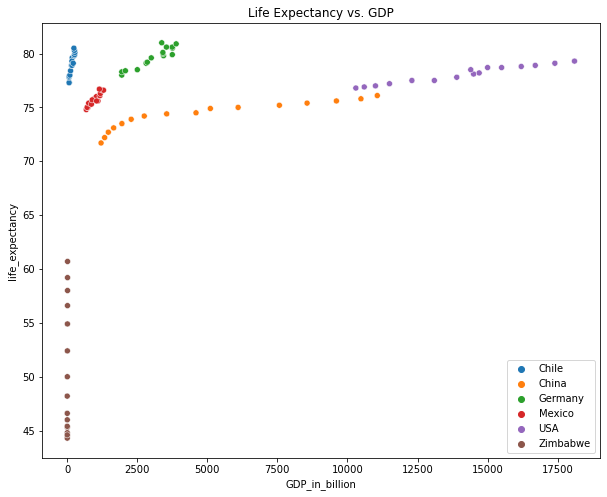

In [160]:
# create a scatter plot containing six countries' life expectancy and GDP
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='GDP_in_billion', y='life_expectancy', hue='Country')
plt.title('Life Expectancy vs. GDP')
plt.legend()
plt.show()

From this scatter plot, I can see that for Chile, China, Germany, Mexico, and USA, the life expectancy increases as the GDP increases. However, it is especially noticeable that Zimbabwe, which has GDP significantly lower than other countries, has scatter points located around 0 on x axis. We will be looking at each country's scatter plot instead.

In [161]:
# create a function that creates scatter plot for all countries with x as GDP and y as life expectancy
def scatter(country, dataframe):
    sub_df = dataframe[dataframe['Country'] == country]
    
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=sub_df, x='GDP_in_billion', y='life_expectancy', hue='Year')
    plt.title('GDP vs. Life Expectancy for ' + country)
    plt.legend(loc=5, fontsize=8)
    plt.show()
    plt.clf()

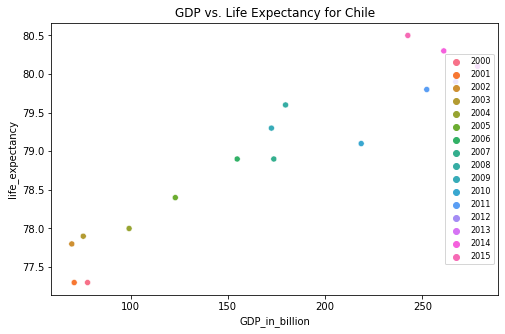

<Figure size 432x288 with 0 Axes>

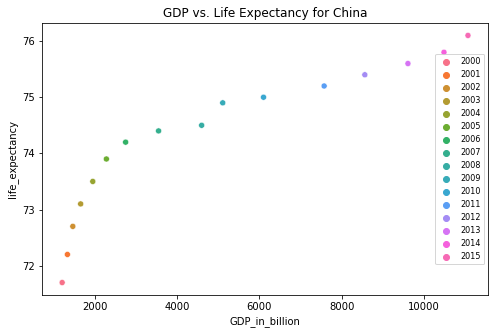

<Figure size 432x288 with 0 Axes>

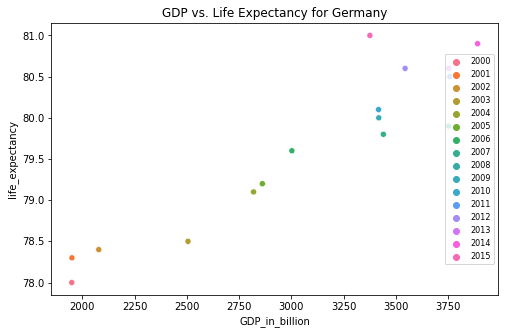

<Figure size 432x288 with 0 Axes>

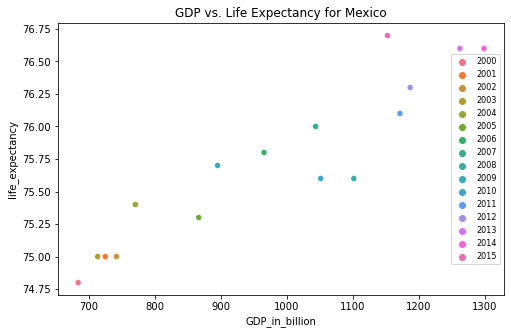

<Figure size 432x288 with 0 Axes>

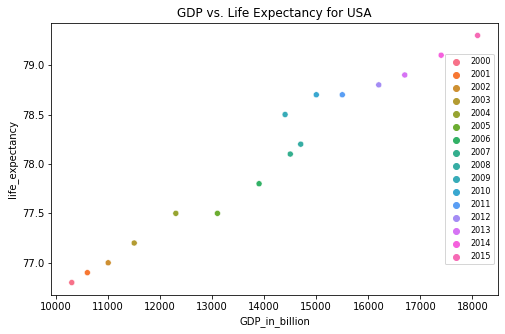

<Figure size 432x288 with 0 Axes>

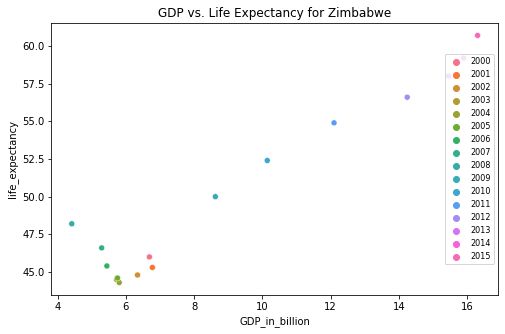

<Figure size 432x288 with 0 Axes>

In [162]:
for country in df['Country'].unique():
    scatter(country, df)

From the scatter plots above, there are some interesting findings:
- In general, life expectancy increases as total GDP increases for all countries.
- In Chile, Germany, Mexico, USA, and Zimbabwe, it occurred that when there was a large drop in GDP, life expectancy was not greatly impacted.
- China's graph shows a constant growth in GDP and life expectancy; however, it was remarkably smooth while other five countries all have experienced some drop in GDP over the years.

In [163]:
# calculate the correlation between total GDP and life expectancy for each country
def corr(country, dataframe):
    df_sub = dataframe[dataframe['Country'] == country]
    
    corr, p = pearsonr(df_sub.GDP_in_billion, df_sub.life_expectancy)
    print(country)
    print(corr)

In [164]:
for country in df.Country.unique():
    corr(country, df)

Chile
0.9498766659254413
China
0.9085255408648358
Germany
0.9326988982561268
Mexico
0.9322377167847082
USA
0.9817092382430257
Zimbabwe
0.9661998955858779


From the calculation results, it is clear that there is a strong linear association between total GDP and life expectancy in all countries.

In [165]:
# create line plots for each country to see the trend for total GDP and life expectancy 2000-2015.
## first, use MinMaxScaler to normalize GDP and life expectancy so that they are equally scaled on the line plot.
from sklearn.preprocessing import MinMaxScaler

In [177]:
def gdp_le_trend(country):
    scaler = MinMaxScaler()
    gdp_le = df[['GDP_in_billion', 'life_expectancy']][df['Country'] == country]
    scaled_gdp_le = scaler.fit_transform(gdp_le)
    scaled_df = pd.DataFrame(scaled_gdp_le, columns=['norm_gdp', 'norm_le'])
    
    year = [year for year in range(2000, 2016)]
    le = scaled_df['norm_le']
    gdp = scaled_df['norm_gdp']
    plt.plot(year, le)
    plt.plot(year, gdp)
    plt.legend(['life expectancy', 'GDP'])
    plt.title(country + ' GDP and Life Expectancy Trend 2000-2015')
    plt.xlabel('Year')
    plt.ylabel('Normalized Values')
    plt.show()
    plt.clf()

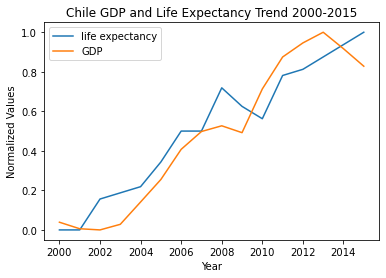

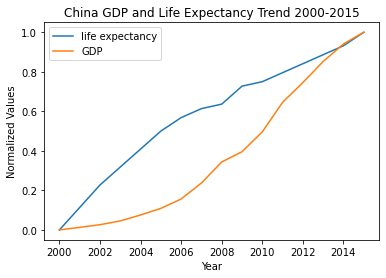

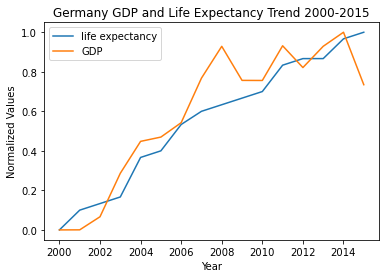

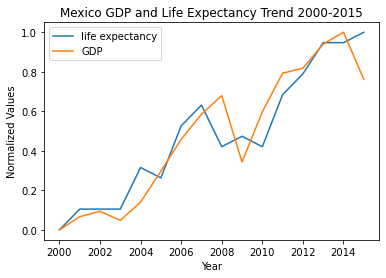

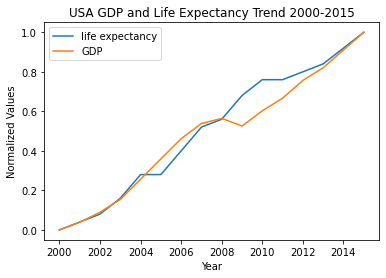

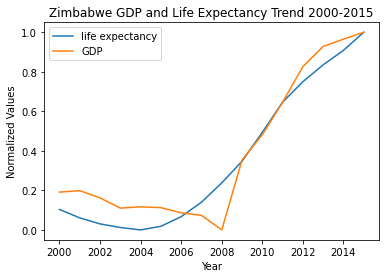

<Figure size 432x288 with 0 Axes>

In [181]:
for country in df['Country'].unique():
    gdp_le_trend(country)

From the line plots above, we can see that life expectancy and total GDP both have positive trends in general for all countries. From this graph, it is clearer to see even when there is a great and sudden drop on total GDP, life expectancy is not impacted in the same year.